In [2]:
#starting with the importinf libraries 
import torch;
import torch.nn as nn

In [3]:
# Create a sample small data 
x = torch.arange(0,1,0.1).unsqueeze(1)
y = x*2 + 1

In [6]:
x_test = torch.tensor([[0.15],[0.55],[0.85]])
y_test = x_test * 2 + 1

In [7]:
# Creating a model
model = nn.Sequential(
    nn.Linear(1,1,)
)

In [8]:
# calculating the loss
loss_Fn = nn.L1Loss()
# help to learn the model effectively
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [9]:
epchoes = 200

#Training loop 
for epoch in range(epchoes):
    model.train()
    y_pred = model(x)
    loss = loss_Fn(y_pred,y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 ==0:
        print(epoch , loss.item())

0 1.6413116455078125
10 1.521061658859253
20 1.400811791419983
30 1.2805618047714233
40 1.1603119373321533
50 1.0400620698928833
60 0.9198120832443237
70 0.8086899518966675
80 0.7244397401809692
90 0.6435500383377075
100 0.5890597701072693
110 0.5345695614814758
120 0.49263280630111694
130 0.4614230990409851
140 0.4302133619785309
150 0.4055910110473633
160 0.3907010555267334
170 0.37581104040145874
180 0.36092111468315125
190 0.346031129360199


In [17]:
model.eval()
test_loss = 0
with torch.inference_mode():
    y_test_pred = model(x_test)
    testLoss = loss_Fn(y_test_pred,y_test)

In [18]:
for name , params in model.named_parameters():
    print(name,params.data)

0.weight tensor([[0.6473]])
0.bias tensor([1.5496])


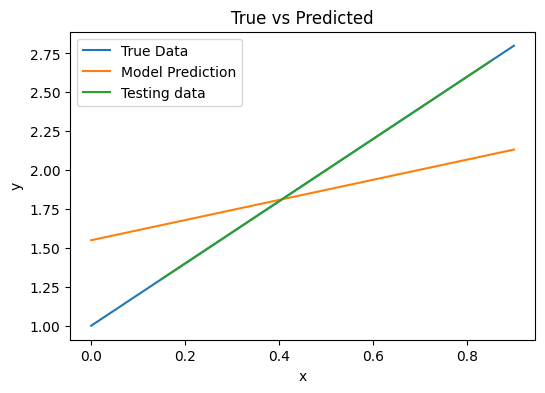

In [19]:
import matplotlib.pyplot as plt

with torch.inference_mode():
    y_pred = model(x)
    
plt.figure(figsize=(6,4))
plt.plot(x, y, label="True Data")           # original line (y = 2x + 1)
plt.plot(x, y_pred, label="Model Prediction")
plt.plot(x_test,y_test ,label="Testing data")
plt.legend()
plt.title("True vs Predicted")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [20]:
model.state_dict()

OrderedDict([('0.weight', tensor([[0.6473]])), ('0.bias', tensor([1.5496]))])